## Principal Component Analysis Tutorial

### Introduction

In this tutorial, I will teach you all about Principal Component Analysis (PCA). Say you have a dataset with 10,000 data points, each with 150 features. As you can imagine, training a prediction model on this data will be computationally expensive. Or imagine you have a dataset with 30 features but you wish to visualize the data, without creating graphs compare each of the features to each other (that would be $\binom{30}{2} = 435$ plots!). Then PCA sounds like a good thing to look into!

PCA is a type of unsupervised learning used for dimension reduction, and has applications in both prediction and data visualization. The main idea of PCA is to find directions on which to project your data, directions which preserve the maximal amount of variability within your data and are orthogonal to each other. By picking a number of principal directions to project your data onto strictly smaller than the number of features, you can reduce the size of the data while maintaining the most information. This may sound a bit confusing at first, but we will soon get into the specifics!

### General Idea

Let our data matrix be denoted as $X \in \mathbb{R}^{nxp}$ where $n$ is the number of datapoints and $p$ is the number of features. We can write the features of $X$ as $X_{1}, X_{2}, ... , X_{p} \in \mathbb{R}^{n}$. PCA seeks to keep the number of rows but reduce the number of columns of the matrix to a number $k$ where $k < p$. Each of these columns will be our principal components, with the first column being our first principal component and second column being our second principal component and so on. Each of the principal components are normalized linear combinations of the features $X_{1}, X_{2}, ... , X_{p}$. We can write the first principal component as:
$$ Xv_{1} = X_{1}v_{1,1} + X_{2}v_{2,1} + ... + X_{p}v_{p,1}$$ 
and our $p^{th}$ principal component as:
$$ Xv_{p} = X_{1}v_{1,p} + X_{2}v_{2,p} + ... + X_{p}v_{p,p}$$ 
where $v_{1,1}, v_{2,1}, ..., v_{p,1} \in \mathbb{R}$ are the loadings of our first principal component and the loadings are normalized, so that $\sum_{i=1}^{p}{v_{1,i}^{2}} = 1$. And finally, $v_{1}, v_{2}, ..., v_{p} \in \mathbb{R}^{p}$ are our princpal directions ($v_{1} = [v_{1,1} v_{2,1} ... v_{p,1}]$).  Note: I wrote above up to the $p^{th}$ component because you can make up to $p$ principal components. (Aside: where $V = [v_{1} v_{2} ... v_{p}]$, generally you can have it such that $X = XVV^T \in \mathbb{R}^{nxp}$ if $V$ contains all $p$ principal directions. This is a more concise way of storing $X$). Now, even though you can have $p$ principal components, again the idea of PCA is dimension reduction, so you will choose the first $k < p$ principal components ($XV_k = X[v_{1} v_{2} ... v_{k}]$) to be the new columns of your new, more concise data matrix. But how do we find these components? 

![title](https://archive.cnx.org/resources/269e78e2506cdbdc7f45ca17bb7d83491ce0c644/pca.jpg)

### Finding $V_k$

Let's focus on the first principal component: $Xv_{1} = X_{1}v_{1,1} + X_{2}v_{2,1} + ... + X_{p}v_{p,1}$. The idea is that $v_1$ is the direction which when projected onto, X will have the most variance. Assuming $X$ has been centered, this variance can be written as $\frac{1}{n}(Xv)^{T}Xv$. We seek to maximize the variance because this way, although we are doing dimension reduction, we can retain as much information as we can.  The first principal direction is thus $v_1 = \underset{\|v\| = 1}{\operatorname{argmax}}\frac{1}{n}(Xv)^{T}Xv$. Now the second principal component will again be a linear combination of the features $X_{1}, X_{2}, ... , X_{p}$ that has maximum variance but is uncorrelated with the first principal component. Why? To avoid redundancy. We are trying to capture as much information as we can, and if the second principal component is correlated with the first, we have to be capturing some of the same information. It can be shown that constraining the second component to be uncorrelated with the first is the same as making sure the second principal direction is orhtogonal to the first. Look at the figure above for more intuition. Thus, $v_2 = \underset{\|v\| = 1, v \perp v_1}{\operatorname{argmax}}\frac{1}{n}(Xv)^{T}Xv$. To generalize, we can write $v_k = \underset{\|v\| = 1, v \perp v_1, v_2, ..., v_{k-1}}{\operatorname{argmax}}\frac{1}{n}(Xv)^{T}Xv$. You can then determine the variance explained by each of the principal components, and keep the first few such that, in total, they explain much of the variance of the data. Coolly enough, scientists can find these values by SVD, or singular value decomposition. I will touch on this by saying that once you put $X$ in terms of $UDV^T$, you've found your principal directions! The columns of $V$ will be your principal directions. Very cool!

### Getting Started Coding

Now that we have the math out of the way and understand what's going on under the hood (so to speak), we can look at how to code PCA. First we want to import all of the necessary functions. We will be using pandas dataframes, `sklearn`'s PCA function as well processing and classification, `sns` for color palettes, and `numpy` for general array usage. If you do not have any of these libraries installed, I would suggest doing so, like below:

`$ pip install -U scikit-learn`

or conda:

`$ conda install scikit-learn`

In [1]:
import pandas as pd
from sklearn import decomposition
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import numpy as np

### Preparing the Data

I will use an example dataset to demonstrate PCA. The dataset I have chosen is a car dataset from the UCI Machine Learning Respository found in this [link](https://archive.ics.uci.edu/ml/datasets/automobile). We will read this in using `pandas`. The cars dataset has a total of 26 features. It gives the first three features (symboling, normalized losses, make) as possible values to predict. For the classification part of the tutorial I will use 'make' as the value we are seeking to analyze. 'make' is a categorical variable with 18 different values (e.g. audi, bmw, chevrolet, dodge, etc...).

In [2]:
cars_data = pd.read_csv('cars.csv', header=None, names=['symboling','normalized-losses','make','fuel-type','aspiration',
                                           'num-of-doors','body-style','drive-wheels','engine-location',
                                           'wheel-base','length','width','height','curb-weight','engine-type',
                                           'num-of-cylinders','engine-size','fuel-system','bore','stroke',
                                           'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
                                           'price'])
# Clean data to make rows full
for feature in cars_data.columns.values:
    cars_data = cars_data[~cars_data[feature].isin(['?'])]
cars_data = cars_data.reset_index()

print(cars_data.dtypes)
cars_data.head()

index                  int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
1,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,6,1,158,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
3,8,1,158,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
4,10,2,192,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


As you can tell, actually many of the features in the dataset are categorical rather than numerical. But because PCA has to take in numerical values to work, we will change these categorical variables to be factor variables with a number for each category. One should be wary of doing this all the time, cause order may be introduced where it is not appropriate (dummy variables would instead be better), but for the sake of this tutorial, this will suffice. We can also see that some of the continuous values are stored as strings, so we fix those. We should also center and scale our data such that larger values aren't automatically denoted as having 'more information'. Below I have done this, with also removing the 'make' variable from the data matrix which I have now stored in X. The data matrix is now ready!

In [3]:
make = cars_data['make'] #maintain names of make of car for data visualization
for feature in ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
               'engine-type','num-of-cylinders','engine-size','fuel-system']:
    cars_data[feature] = pd.Categorical(cars_data[feature]).codes 

for feature in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    cars_data[feature] = cars_data[feature].astype('float64')
    
X = StandardScaler().fit_transform(cars_data.drop(['make'], axis=1))

cars_data.shape

(159, 27)

As you can see, we have a lot of features (columns), but not a lot of data (rows). This can be a problem in classification due to something called "the curse of dimentionality". Thus we proceed in PCA. 

In [6]:
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

### Performing PCA

I used sklearn's PCA model to perform pca on the data. The documentation for it can be found in this [link](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). The value `XVV`, the result of the `fit_transform()` function, is a ndarray type matrix where each row corresponds to a datapoint and each column represents a principal component. I entered in the maximum amount of principal components you can have for our data matrix so that I could collect information regarding the variance of each component. A list of the percentage of variance that each principal component explains is contained in `pca.explained_variance_ratio_.` The graph of the cumulative variance explained is shown below.

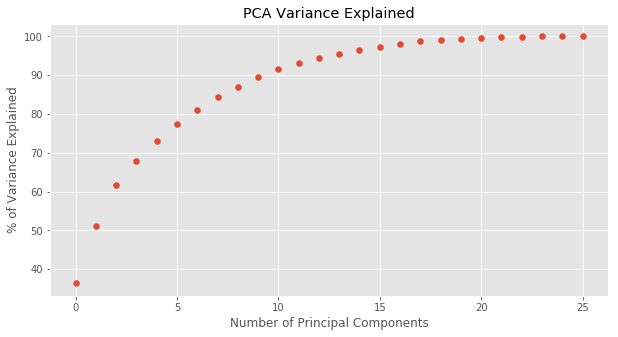

In [7]:
pca = decomposition.PCA(n_components = 26)
XVV = pca.fit_transform(X)

plt.scatter(list(range(0,26)), pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('Number of Principal Components')
plt.ylabel('% of Variance Explained')
plt.title("PCA Variance Explained")
plt.show()

The graph above can be used to visually determine what number of components is necessary to maintain a certain degree of variance within the data. Usually, you want to aim for a higher percentage of variance explained, like 90-98%. Judging the graph above, this would mean keeping around 10 to 15 of the components. Already an improvement from 26 features!

### Visualizing the Data

Below I have plotted all of the points with the first principal component as the x-axis and the second as the y-axis. I then color coded by the different 'make' of the car. Even though there are many different types of cars, you can see, even in this lower dimension, that the different makes are grouped together. For example, the group of red mercedes-benz in the corner, or the group of gray volvos to the left of it, or the yellow hondas all the way on the left!

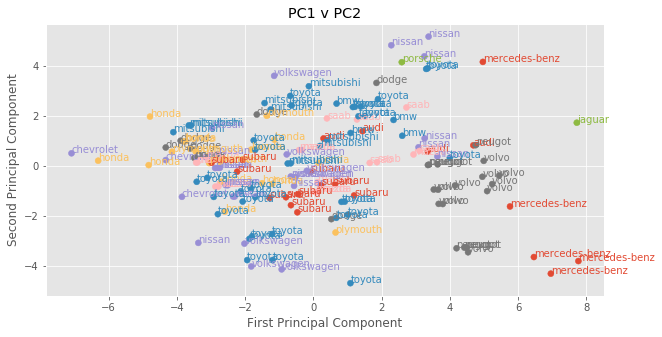

In [8]:
colors = sns.color_palette(n_colors=18)
pc_1 = XVV[:,0]
pc_2 = XVV[:,1]
plt.scatter(pc_1, pc_2, c=np.array(colors)[pd.Categorical(make).codes])
for i,txt in enumerate(make.as_matrix()):
   plt.text(s=txt, x=pc_1[i], y=pc_2[i],
            color=colors[pd.Categorical(make).codes[i]])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PC1 v PC2")
plt.show()

The plot above tells me that the different makes of the cars have similarities in their features, and that I can use those features in trying to classify the make of other cars.

### Classification

I will show below how PCA is actually quite good to the classification algorithm, k-nearest-neighbors. k-nearest-neighbors classifies new points based on their distance between points in the training data and which group they belong to. But what you see in practice is that k-nearest-neighbors actually gets worse the more features that you have. This [link](https://en.wikipedia.org/wiki/Curse_of_dimensionality) explains that further. Lets first look at how k-nearest-neighbors does with the original data matrix. I first split the data into training and testing, and print out the mean squared testing error.

In [9]:
np.random.seed(1)

y = cars_data['make']

#Split the data
train_inds = np.random.choice(X.shape[0], round(X.shape[0]*0.7), replace=False)
test_inds = ~np.in1d(range(X.shape[0]),train_inds)
train_X = X[train_inds,]
train_y = y[train_inds]
test_X = X[test_inds,]
test_y = y[test_inds]

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_X, train_y)
test_err = np.mean((classifier.predict(test_X) - test_y)**2)
test_err

6.333333333333333

And below I ran the k-nearest neighbors algorithm on the new data matrix where the columns are the first 15 principal components (15 because as you can see from the variance explained graph from above, 15 principal components captures a lot of the variance).

In [10]:
np.random.seed(1)

XVV_k = XVV[:,0:15]

#Split the data
train_X = XVV_k[train_inds,]
train_y = y[train_inds]
test_X = XVV_k[test_inds,]
test_y = y[test_inds]

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_X, train_y)
test_err = np.mean((classifier.predict(test_X) - test_y)**2)
test_err

3.9791666666666665

We see that the error is a bit better. And with a smaller data matrix!

### Random Forest

In the next part of this tutorial, we will use the same dataset, but shift out focus to predicting the normalized losses of the automobiles, which are a continuous variable ranging from 65 to 256. This way, I hope to demonstrate how PCA can help with predicting continuous variables. We will use random forest to make such predictions. Below I repeat much of what I did before. I created my data matrix, this time noramlizing it without the `normalized-losses` column. I then fit the PCA model and plotted the percentage of variance that each number of principal components explained. Like before the optimal number seems to be around 10 to 15.

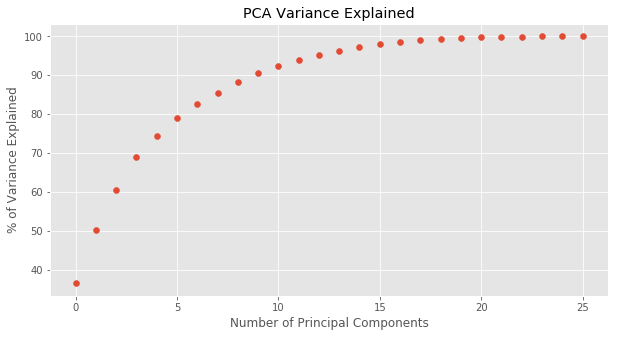

In [11]:
from sklearn.ensemble import RandomForestRegressor

X = StandardScaler().fit_transform(cars_data.drop(['normalized-losses'], axis=1))
pca = decomposition.PCA(n_components = 26)
XVV = pca.fit_transform(X)

y = cars_data['normalized-losses'].astype('float64')

plt.scatter(list(range(0,26)), pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('Number of Principal Components')
plt.ylabel('% of Variance Explained')
plt.title("PCA Variance Explained")
plt.show()

Next I split the data into training and testing data, with the same rows to spearate the data as I used before. First I trained the random forest model on the full $XVV^T$ data matrix.

In [12]:
np.random.seed(1)
X = XVV[:,:]
train_X = X[train_inds,]
train_y = y[train_inds]
test_X = X[test_inds,]
test_y = y[test_inds]

rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)

test_err = np.mean((rf_model.predict(test_X) - test_y)**2)
test_err

645.5733333333334

This gave an error of around 645.57. I then trained on the first 15 principal components (so $XV_kV_k^T$ where $V_k = [v_1 ... v_k]$ and k = 15)

In [13]:
np.random.seed(1)
X = XVV[:,0:15]
train_X = X[train_inds,]
train_y = y[train_inds]
test_X = X[test_inds,]
test_y = y[test_inds]

rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)

test_err = np.mean((rf_model.predict(test_X) - test_y)**2)
test_err

566.4687499999999

This gives a lower test error by almost one-hundred, and with a smaller data matrix!

### Final Thoughts

I hope this tutorial gave you an in depth explaination of what PCA seeks to do, what PCA actully does, and the MANY applications that it can have. It's quite amazing how one can retain so much information with a reduced matrix, and I encourage you all to explain the wonderful world of PCA and see what it can do for you!

